# f(x) = (sin(x)/2 + cos(x)/2) ** 2 * sin(x)

1. Определить корни
2. Найти интервалы, на которых функция возрастает
3. Найти интервалы, на которых функция убывает
4. Построить график
5. Вычислить вершину
6. Определить промежутки, на котором f > 0
7. Определить промежутки, на котором f < 0

# 1. Определить корни

In [4]:
from sympy import *

x = Symbol('x')
func = (sin(x)/2 + cos(x)/2) ** 2 * sin(x)
func

(sin(x)/2 + cos(x)/2)**2*sin(x)

In [5]:
root = solve(func,x)
root

[0, -pi/4, 3*pi/4, pi]

# 2, 3 Интервалы возрастания и убывания функции

In [7]:
# производная
res = diff(func,x)
res

(-sin(x) + cos(x))*(sin(x)/2 + cos(x)/2)*sin(x) + (sin(x)/2 + cos(x)/2)**2*cos(x)

In [8]:
# корень производной
root_res = solve(res, x)
root_res

[-pi/4,
 3*pi/4,
 -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2),
 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2),
 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2),
 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)]

In [9]:
# перегибы
point = []  
for i in root_res:
    point.append(round(i.evalf(),2))
point.insert(0,-pi)
point.append(pi)
point.sort()
point

[-pi, -2.08, -0.79, -0.27, 1.06, 2.36, 2.87, pi]

In [10]:
interval = []
for i in range(0, len(point)-1):
    interval.append(Interval(point[i], point[i+1]))
interval

[Interval(-pi, -2.08),
 Interval(-2.08, -0.79),
 Interval(-0.79, -0.27),
 Interval(-0.27, 1.06),
 Interval(1.06, 2.36),
 Interval(2.36, 2.87),
 Interval(2.87, pi)]

In [11]:
mid_interval = []
for i in range(0, len(point)-1):
    mid_interval.append(round((point[i]+ (point[i+1] - point[i])/2).evalf(),2))
mid_interval

[-2.61, -1.44, -0.53, 0.40, 1.71, 2.62, 3.01]

## Возрастание

In [12]:
for i, j in enumerate(mid_interval):
    if res.subs(x, j).evalf() > 0:
        print(f'{interval[i]}')

Interval(-2.08, -0.79)
Interval(-0.27, 1.06)
Interval(2.36, 2.87)


## Убывание

In [13]:
for i, j in enumerate(mid_interval):
    if res.subs(x, j).evalf() < 0:
        print(f'{interval[i]}')

Interval(-pi, -2.08)
Interval(-0.79, -0.27)
Interval(1.06, 2.36)
Interval(2.87, pi)


# 4. Построить график

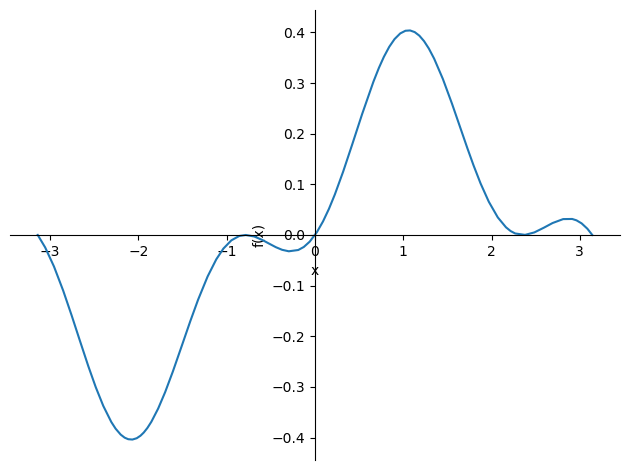

In [6]:
graph = plot(func, (x, -pi, pi))

# 5. Вычислить вершину

In [15]:
top = point[1:-1]
index = 1
for i in top:
    print(f'{index}: x = {i}, y = {round(func.subs(x,i).evalf(),2)}')
    index += 1

1: x = -2.08, y = -0.40
2: x = -0.79, y = 0.0
3: x = -0.27, y = -0.03
4: x = 1.06, y = 0.40
5: x = 2.36, y = 0.0
6: x = 2.87, y = 0.03


# 6 Определить промежутки, на котором f > 0

In [16]:
solveset(func > 0, x, S.Reals)

Union(Interval.open(0, 3*pi/4), Interval.open(3*pi/4, pi))

# 7 Определить промежутки, на котором f < 0

In [17]:
solveset(func < 0, x, S.Reals)

Union(Interval.open(pi, 7*pi/4), Interval.open(7*pi/4, 2*pi))